# AriaQuanta Tutorial

# Table of Contents

- [Installation](#installation)


- [Qubits](#qubits)


- [Gates](#gates)
    * [Single-qubit gates](#singlequbitgates)
    * [Double-qubit gates](#doublequbitgates)
    * [Triple-qubit gates](#triplequbitgates)
    * [Custom gates](#customgates)
    * [Controlled gates](#controlledgates)
      
      
- [Quantum circuit](#circuit)
    * [Simple run](#simplerun)
    * [Simple measure](#simplemeasure)
    * [Statevector to a probability plot](#svtoprob)
    * [Converting a circuit to a custom gate](#qctogate)
      
      
- [Operations on a circuit](#operations)
    * [Measure gates](#measuregates)
    * [Conditional gates](#conditionalgates)
    * [Noise gates](#noisegates)


- [Backend](#backend)
    * [Job](#backendjob)
    * [Simulator](#backendsimulator)
    * [Result](#backendresult)
    
    
- [Quantum Algorithms](#algorithms)
    * [Bernestein-Vazirani](#bv_algorithm)
    * [Teleportation](#teleportation)
    * [Deutsch Jozsa Algorithm](#djalgorithm)
    * [Grover's Algorithm](#grover)
    * [Quantum Fourier Transform](#qft)
    * [Inverse Quantum Fourier Transform](#iqft)
    * [Quantum Phase Estimation](#qpe)

    
- [Reordering the qubits](#reorder)


- [Testing circuits comparing with Qiskit](#compareqiskit)
    * [Testing single-qubit gates](#compareqiskit1qubit)
    * [Testing double-qubit gates](#compareqiskit2qubit)
    * [Testing triple-qubit and control gates](#compareqisktcontrol)
    * [Testing custom gates](#compareqiskitcustom)
   
- [Run-time of AriaQuanta compared with other libraries](#runtime)   

# Installing AriaQuanta <a id="installation"></a>


AriaQuanta is available on the `pip` repository, and it can be installed by the following command.


pip install AriaQuanta

The requirements for the package is as the following. These will be installed automatically when installing AriaQuanta:

- numpy
- scipy
- matplotlib
- pandas


# Qubits <a id="qubits"></a>

The smallest element of a quantum computing library is a qubit. To define a set of qubits, the `MultiQubit` object is used. This object is a set of `Qubit` objects. For one qubit, it is possible to use either `Qubit` or `MultiQubit`.

- Qubit class:

class `AriaQuanta.aqc.qubit (state=np.array([[1], [0]]), name='')`

**Attributes**
- state (numpy array)
- name (optional)

- MultiQubit class:

class `AriaQuanta.aqc.MultiQubit (num_of_qubits, list_of_qubits=[])`
    
**Attributes**  
- num_of_qubits (int)   
- multistate (numpy array)
- qubits (list of Qubits)

In [26]:
# Defining 1 qubit using Qubit:

from AriaQuanta.aqc.qubit import Qubit

onequbit = Qubit('q0')

print("\nstate is:", onequbit.state)
print("\nname is:", onequbit.name)


state is: [[1]
 [0]]

name is: q0


In [27]:
# Defining 1 qubit using MultiQubit:

from AriaQuanta.aqc.qubit import MultiQubit

onequbit_multi = MultiQubit(1, [onequbit])

print('\nnumber of qubits are:', onequbit_multi.num_of_qubits)
print('\nqubits are:', onequbit_multi.qubits)
print('\nstate is:', onequbit_multi.multistate)

# You can access the qubits by their indices as well

print('\nstate of qubit[0] is:', onequbit_multi.qubits[0].state)
print('\nname of qubit[0] is:', onequbit_multi.qubits[0].name)


number of qubits are: 1

qubits are: [<AriaQuanta.aqc.qubit.Qubit object at 0x7a50b91f1790>]

state is: [[1]
 [0]]

state of qubit[0] is: [[1]
 [0]]

name of qubit[0] is: q0


Same as the above example, a system with more than one qubit can be defined. You can either use a list of your own `Qubit` objects, or only define the number of qubits. In the second case, the initial state will be a superposition of `|0>` and the default names are `None`

In [28]:
# Defining 3 qubits using MultiQubit

from AriaQuanta.aqc.qubit import MultiQubit

myqubits = MultiQubit(3)

print('\nnumber of qubits are:', onequbit_multi.num_of_qubits)
print('\nqubits are:', onequbit_multi.qubits)
print('\nstate is:', onequbit_multi.multistate)


number of qubits are: 3

qubits are: [<AriaQuanta.aqc.qubit.Qubit object at 0x7a50997f3f10>, <AriaQuanta.aqc.qubit.Qubit object at 0x7a50997f1790>, <AriaQuanta.aqc.qubit.Qubit object at 0x7a50997f3410>]

state is: [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Quantum Gates <a id="gates"></a>

Gates in AriaQuanta library are in the `gatelibrary`, and are part of different classes as follows:

- Single-qubit gates:

class `AriaQuanta.aqc.gatelibrary.GateSingleQubit (name, matrix, target_qubits)`

- Double-qubit gates:

class `AriaQuanta.aqc.gatelibrary.GateDoubleQubit (name, matrix, target_qubits)`

- Triple-qubit gates:

class `AriaQuanta.aqc.gatelibrary.GateTripleQubit (name, matrix, target_qubits)`

- Custom gates:

class `AriaQuanta.aqc.gatelibrary.GateCustom (name, matrix, target_qubits)`

- Controlled gates:

class `AriaQuanta.aqc.gatelibrary.GateControl (name, base_matrix, control_qubits, target_qubits)`


All the gates can be accessed through `gatelibrary` by the gate's name, no matter if it is from which type of the gate, defined above. For example:

`from AriaQuanta.aqc.gatelibrary import X, SWAP, CCX, Custom, CX`

## GateSingleQubit <a id="singlequbitgates"></a>

**Class**

- class `AriaQuanta.aqc.gatelibrary.GateSingleQubit (name, matrix, target_qubit)`

**General Attributes**

Note that some gates have also another attributes (like the angle, mentioned in the **Gates** part, listed bellow.)

- name (str)
- matrix (numpy array of float)
- qubits (list of int)

**Methods**

- multistate = apply (num_of_qubits, multistate))


**Gates (and their specific inputs/attributes)**

The gates with inputs also has the attributes related to the inputs (e.g. attribute `delta` for `GlobalPhase` gate)

- I:

class `I(GateSingleQubit) (target_qubits=0)`
    
- GlobalPhase (delta):

class `GlobalPhase(GateSingleQubit) (delta, target_qubits=0)`
    
- X:

class `X(GateSingleQubit) (target_qubits=0)`
    
- Y:

class `Y(GateSingleQubit) (target_qubits=0)`
    
- Z:

class `Z(GateSingleQubit) (target_qubits=0)`
    
- S:

class `S(GateSingleQubit) (target_qubits=0)`
    
- Xsqrt:

class `Xsqrt(GateSingleQubit) (target_qubits=0)`
    
- H:

class `H(GateSingleQubit) (target_qubits=0)`

- P (phi):

class `P(GateSingleQubit) (phi, target_qubits=0)`
    
- T:

class `T(GateSingleQubit) (target_qubits=0)`
    
- RX (theta):

class `RX(GateSingleQubit) (theta, target_qubits=0)`
    
- RY (theta):

class `RY(GateSingleQubit) (theta, target_qubits=0)`
    
- RZ (theta):

class `RZ(GateSingleQubit) (theta, target_qubits=0)`
    
- Rot (theta, phi, lambda_):

class `Rot(GateSingleQubit) (theta, phi, lambda_, target_qubits=0)`


In [29]:
from AriaQuanta.aqc.gatelibrary import X
import math

xgate = X()

print("\nname is:", xgate.name)
print("\nmatrix is:", xgate.matrix)
print("\nqubits are:", xgate.qubits)


name is: X

matrix is: [[0 1]
 [1 0]]

qubits are: [0]


In [30]:
from AriaQuanta.aqc.gatelibrary import RZ
import math

rzgate = RZ(math.pi)

print("\nname is:", rzgate.name)
print("\nmatrix is:", rzgate.matrix)
print("\nqubits are:", rzgate.qubits)


name is: RZ

matrix is: [[0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j]]

qubits are: [0]


## GateDoubleQubit <a id="doublequbitgates"></a>

**Class**

- class `AriaQuanta.aqc.gatelibrary.GateDoubleQubit (name, matrix, target_qubits)`

**General Attributes**

Note that some gates have also another attributes (like the angle, mentioned in the **Gates** part, listed bellow.)

- name (str)
- matrix (numpy array of float)
- qubits (list of int)

**Methods**

- multistate = apply (num_of_qubits, multistate))

**Gates (and their specific inputs/attributes)**

The gates with inputs also has the attributes related to the inputs (e.g. attribute `alpha` for `SWAPalpha` gate)

- SWAP:

class `SWAP(GateDoubleQubit) (target_qubits_1=0, target_qubits_2=1)`
    
- ISWAP:

class `ISWAP(GateDoubleQubit) (target_qubits_1=0, target_qubits_2=1)`
    
- SWAPsqrt:

class `SWAPsqrt(GateDoubleQubit) (target_qubits_1=0, target_qubits_2=1)`
    
- SWAPalpha (alpha):

class `SWAPalpha(GateDoubleQubit) (alpha, target_qubits_1=0, target_qubits_2=1)`
    
- RXX (phi):

class `RXX(GateDoubleQubit) (phi, target_qubits_1=0, target_qubits_2=1)`
    
- RYY (phi):

class `RYY(GateDoubleQubit) (phi, target_qubits_1=0, target_qubits_2=1)`
    
- RZZ (phi):

class `RZZ(GateDoubleQubit) (phi, target_qubits_1=0, target_qubits_2=1)`
    
- RXY (phi):

class `RXY(GateDoubleQubit) (phi, target_qubits_1=0, target_qubits_2=1)`

- Barenco (alpha, phi, theta):

class `Barenco(GateDoubleQubit) (alpha, phi, theta, target_qubits_1=0, target_qubits_2=1)`
    
- Berkeley:

class `Berkeley(GateDoubleQubit) (target_qubits_1=0, target_qubits_2=1)`
    
- Canonical (a, b, c):

class `Canonical(GateDoubleQubit) (a, b, c, target_qubits_1=0, target_qubits_2=1)`
    
- Givens (theta):

class `Givens(GateDoubleQubit) (theta, target_qubits_1=0, target_qubits_2=1)`
    
- Magic:

class `Magic(GateDoubleQubit) (target_qubits_1=0, target_qubits_2=1)`
    

In [31]:
from AriaQuanta.aqc.gatelibrary import SWAP

swapgate = SWAP()

print("\nname is:", swapgate.name)
print("\nmatrix is:", swapgate.matrix)
print("\nqubits are:", swapgate.qubits)


name is: SWAP

matrix is: [[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]

qubits are: [0, 1]


In [32]:
from AriaQuanta.aqc.gatelibrary import RXX
import math

rxxgate = RXX(math.pi)

print("\nname is:", rxxgate.name)
print("\nmatrix is:", rxxgate.matrix)
print("\nqubits are:", rxxgate.qubits)


name is: RXX

matrix is: [[0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.-1.j 0.+0.j 0.+0.j 0.+0.j]]

qubits are: [0, 1]


## GateTripleQubit <a id="triplequbitgates"></a>

Triple-qubit gates `CSWAP` and `CCX` are now part of the `GateControl` class. The information can be found in the related [section](#controlledgates)

In [33]:
# Example of a triple-qubit gate

from AriaQuanta.aqc.gatelibrary import CCX

ccxgate = CCX()

print("\nname is:", ccxgate.name)
print("\nmatrix is:", ccxgate.matrix)
print("\nqubits are:", ccxgate.qubits)


name is: CCX

matrix is: [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

qubits are: [0, 1, 2]


## GateCustom <a id="customgates"></a>

**Class**
    
- class `AriaQuanta.aqc.gatelibrary.GateCustom (name, matrix, target_qubits)`

**General Attributes**

- name (str)
- matrix (numpy array of float)
- qubits (list of int)

**Methods**

- multistate = apply (num_of_qubits, multistate))

**Gates**

- Custom gate:

class `Custom(GateCustom) (matrix, target_qubits=0)`


**Notes**

Custom gates are square matrices with any dimension. The only condition to be statified is being "unitary". The exmple below shows a 2-by-2 custom matrix.


In [34]:
# Example of defining custom gates

from AriaQuanta.aqc.gatelibrary import Custom
from AriaQuanta.aqc.circuit import Circuit
import numpy as np 

# Define a custom gate with a 2-D matrix
mymatrix = np.array([[1, 0, 0, 0],
                    [0, 0, +1j, 0],
                    [0, +1j, 0, 0],
                    [0, 0, 0, 1]])

# The number of target qubits are 2 for a 2-D matrix
customgate1 = Custom(mymatrix, [0,1])

qc = Circuit(2)
qc | customgate1
qc.run()
print(qc.statevector)

[[1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


## GateControl <a id="controlledgates"></a>

**Class**
    
- class `AriaQuanta.aqc.gatelibrary.class GateControl (name, base_matrix, control_qubits, target_qubits)`

**General Attributes**

Note that some gates have also another attributes (like the angle, mentioned in the **Gates** part, listed bellow.)

- name (str)
- base_matrix (numpy array of float), this is the base matrix that will be applied when the controlled condition is satisfied.
- matrix (numpy array of float), this is the general representation of the controlled matrix, considering q0 as the control gate.
- control_qubits (numpy array of int)
- target_qubits (numpy array of int)
- qubits (list of numpy array of int)


**Methods**

- multistate = apply (num_of_qubits, multistate))

**Gates (and their specific inputs/attributes)**

- Control on a custom U matrix, CU (base_matrix):

class `CU(GateControl) (base_matrix, control_qubits=0, target_qubits=1)`

- Controlled-X, CX:

class `class CX(GateControl) (control_qubits=0, target_qubits=1)`

- Controlled-Z, CZ:

class `class CZ(GateControl) (control_qubits=0, target_qubits=1)`


- Controlled-Phase, CP (phi):

class `CP(GateControl) (phi, control_qubits=0, target_qubits=1)`

- Controlled-S, CS:

class `class CS(GateControl) (control_qubits=0, target_qubits=1)`

- Controlled-sqaure-X, CSX:

class `class CSX(GateControl) (control_qubits=0, target_qubits=1)`

- Toffoli, controlled-controlled NOT, CCX:

class `CCX(GateControl) (qubits_1=0, qubits_2=1, qubits_3=2)`

- Fredkin, controlled swap

class `CSWAP(GateControl) (qubits_1=0, qubits_2=1, qubits_3=2)`

**Notes**

The general `matrix` representation for a gate `G`, considering q1 as the control qubit, and q0 as the target qubit is computed by the formula below:

$$
  \textrm{Controlled-G}_{q1, q0} = \vert0\rangle \langle0\vert \otimes I + \vert1\rangle \langle1\vert \otimes G
$$

In [35]:
# Example of controlled gates

from AriaQuanta.aqc.gatelibrary import CX

cxgate = CX()

print("\nname is:", cxgate.name)
print("\nbase matrix is:", cxgate.base_matrix)
print("\ncontrolled matrix is:", cxgate.matrix)
print("\ncontrol qubit is:", cxgate.control_qubits)
print("\ntarget qubit is:", cxgate.target_qubits)
print("\nqubits are:", cxgate.qubits)


name is: CX

base matrix is: [[0 1]
 [1 0]]

controlled matrix is: [[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]

control qubit is: [0]

target qubit is: [1]

qubits are: [0, 1]


In [36]:
# Example of controlled gates with arbitrary matrix
# Example of a 1-D matrix

from AriaQuanta.aqc.gatelibrary import CU

matrix1 = np.array([[0, 1], [1, 0]])

cugate1 = CU(base_matrix=matrix1, control_qubits=[0], target_qubits=[1])

print("\nname is:", cugate1.name)
print("\nbase matrix is:", cugate1.base_matrix)
print("\ncontrolled matrix is:", cugate1.matrix)
print("\ncontrol qubit is:", cugate1.control_qubits)
print("\ntarget qubit is:", cugate1.target_qubits)
print("\nqubits are:", cugate1.qubits)


name is: CU

base matrix is: [[0 1]
 [1 0]]

controlled matrix is: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

control qubit is: [0]

target qubit is: [1]

qubits are: [0, 1]


In [37]:
# Example of controlled gates with arbitrary matrix
# Example of a 2-D matrix

from AriaQuanta.aqc.gatelibrary import CU

matrix2 = np.array([[1, 0, 0, 0],
          [0, 0, 1, 0],
          [0, 1, 0, 0],
          [0, 0, 0, 1]])

cugate2 = CU(base_matrix=matrix2, control_qubits=[0], target_qubits=[1,2])

print("\nname is:", cugate2.name)
print("\nbase matrix is:", cugate2.base_matrix)
print("\ncontrolled matrix is:", cugate2.matrix)
print("\ncontrol qubit is:", cugate2.control_qubits)
print("\ntarget qubit is:", cugate2.target_qubits)
print("\nqubits are:", cugate2.qubits)


name is: CU

base matrix is: [[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]

controlled matrix is: [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

control qubit is: [0]

target qubit is: [1 2]

qubits are: [0, 1, 2]


# Quantum circuit <a id="circuit"></a>

A quantum circuit is a set of gates applied to an statevector from a series of entangled qunatum bits. The class is defined as below:

**Class**
    
- class `AriaQuanta.aqc.Circuit (num_of_qubits, num_of_clbits=0, initial_state=None)`

**General Attributes**

- num_of_qubits (int)
- num_of_clbits (int)
- gates (objects of gates class)
- gatesinfo (dictionaty of gates names and their numbers)

- width (int): number of wires of the circuit
- size (int): number of operaition in the circuit
- depth (int): numbber of independent operations in the circuit

- initial_state (numpy array): the initial statevector
- statevector (numpy array)
- density_matrix (numpy array)


**Methods**

- __or__(gate): user-friendly adding gate operation to the circuit:

- add_gate(): adding gates to the circuit:

- state = run(): run a circuit
    
- measurement = measure_all(): measure a circuit

- qc_copy = copy(): copy a circuit object to a new object

**Additional Functions**

There is a function from the `AriaQuanta.aqc.Circuit`, that is used to convert a circuit to a matrix:

- circuit_gate = to_gate(Circuit)


In [38]:
# Defining a circuit and get the info of that:

from AriaQuanta.aqc.gatelibrary import H, X, SWAP
from AriaQuanta.aqc.circuit import Circuit

qc = Circuit(3, 0)
qc | H(0) | X(2) | H(1) | SWAP(0,1)

# these are the infor before running a circuit
# note that the default initial state is the |0>

print("\nnumber of qubits are: ", qc.num_of_qubits)
print("\nnumber of classical bits are: ", qc.num_of_clbits)
#print("all the gates shown as gates libraries are: ", qc.gates)
print("\ncounting all the gates: ", qc.gatesinfo)

print("\nwidth of the circuit: ", qc.width)
print("\nsize of the circuit: ", qc.size)
print("\ndepth of the circuit: ", qc.depth)

print("\ninitial state is: ", qc.initial_state)
print("\nstate vector before running is the initial state: ", qc.statevector)
print("\ndensity matrix before running, the matrix represenation of the initial state: ", qc.density_matrix)


number of qubits are:  3

number of classical bits are:  0

counting all the gates:  {'H': 2, 'X': 1, 'SWAP': 1}

width of the circuit:  3

size of the circuit:  4

depth of the circuit:  2

initial state is:  [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

state vector before running is the initial state:  [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

density matrix before running, the matrix represenation of the initial state:  [[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [39]:
# Check if one can give extra qubits in the circuit

# in this case, the code will raise an error:

from AriaQuanta.aqc.gatelibrary import H, X, SWAP
from AriaQuanta.aqc.circuit import Circuit

qc = Circuit(3, 0)
qc | H(0) | X(2) | H(1) | SWAP(0,5)

ValueError: 5 is out-of-range for the qubit ID. The valid ID is between 0 and 2

## Simple Running of a circuit <a id="simplerun"></a>

The first approach to execute a quantum circuit, is to use the methods `run()`, and `measure_all()`. The two methods are used for a quick run and a one-time measure of the circuit. The example below shows the usage of this appraoch.

**NOTE that the simple `measure_all` just outputs a state without changing the circuit's statevector. It is important if the user wants to check his/her results, running the circuit multiple times**

In [40]:
from AriaQuanta.aqc.gatelibrary import H, X
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

qc = Circuit(2)
qc |  H(0) | X(1)

qc.run()

print("\nstate vector: ", qc.statevector)
print("\ndensity matrix: ", qc.density_matrix)


state vector:  [[0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]]

density matrix:  [[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]]


## Simple measuring of a circuit <a id="simplemeasure"></a>

In [41]:
from AriaQuanta.aqc.gatelibrary import H, X, RXX, CSWAP
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

qc = Circuit(3)
qc |  H(0) | X(1) | RXX(np.pi/2,0,2)

qc.run()

measurement = qc.measure_all()

print("\nmeasurement result: ", measurement)

print("\nstate vector: ", qc.statevector)
print("\ndensity matrix: ", qc.density_matrix)


measurement result:  |110>

state vector:  [[0. +0.j ]
 [0. +0.j ]
 [0.5+0.j ]
 [0. -0.5j]
 [0. +0.j ]
 [0. +0.j ]
 [0.5+0.j ]
 [0. -0.5j]]

density matrix:  [[ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.25+0.j    0.  -0.25j  0.  +0.j    0.  +0.j
   0.25+0.j    0.  -0.25j]
 [ 0.  +0.j    0.  +0.j    0.  -0.25j -0.25+0.j    0.  +0.j    0.  +0.j
   0.  -0.25j -0.25+0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.25+0.j    0.  -0.25j  0.  +0.j    0.  +0.j
   0.25+0.j    0.  -0.25j]
 [ 0.  +0.j    0.  +0.j    0.  -0.25j -0.25+0.j    0.  +0.j    0.  +0.j
   0.  -0.25j -0.25+0.j  ]]


## Output the probability plot using the statevector <a id="svtoprob"></a>

**Method:**

def `AriaQuanta.aqc.Circuit.sv_to_probabilty(statevector, plot=True)`

    return probabilty




state vector:  [[0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]
 [0.70710678+0.j]]

density matrix:  [[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0.5+0.j]]

probability:  {'00': 0.0, '01': 0.0, '10': 0.5, '11': 0.5}


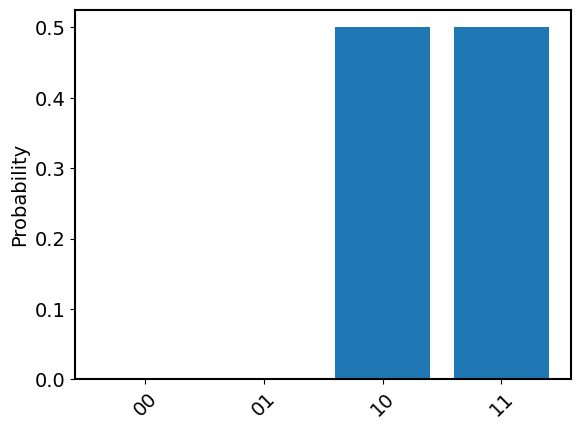

In [42]:
from AriaQuanta.aqc.gatelibrary import H, X
from AriaQuanta.aqc.circuit import Circuit, sv_to_probabilty
import numpy as np

qc = Circuit(2)
qc |  X(0) | H(1)

qc.run()

# ------------ default output
print("\nstate vector: ", qc.statevector)
print("\ndensity matrix: ", qc.density_matrix)

probability = sv_to_probabilty(qc.statevector, plot=True)
print("\nprobability: ", probability)

## Converting a circuit to a custom gate <a id="qctogate"></a>

The function `to_gate` will outputs a `CustomGate` representng the quantum circuit

def `AriaQuanta.aqc.circuit.to_gate(Circuit)`

**Usage:**

circuit_gate = to_gate(Circuit):

In [43]:
from AriaQuanta.aqc.gatelibrary import H, X
from AriaQuanta.aqc.circuit import Circuit, to_gate
import numpy as np

qc = Circuit(2)
qc |  H(0) | X(1)

qc_gate = to_gate(qc)

print(qc_gate.matrix)

[[ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.5       +0.j  0.        +0.j -0.5       +0.j]
 [ 0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.5       +0.j  0.        +0.j  0.5       +0.j]]


# Operations on a circuit <a id="operations"></a>

There are other operations that can be applied. These operations consist of measuring and conditional gates. 

The `MeasureQubit` is a sub-classes of `Measure` that apply measurements on specific qubits of a quantum circuit. 

The `C_If` gate is used to apply a conditional gate afterwards a measurement. The sub-sections below show the usage of these operations.

## Measure gates <a id="measuregates"></a>

The measure class makes it available to add measure gates to a circuit, by measuring specific qubits. `MeasureQubit` measures the specific qubits, while keeping the dimenstion of the original statevector.

**Class**:

class `AriaQuanta.aqc.Measure (name, qubits, clbits, resize)`

**Attributes**

- name [str]
- qubits [list of int]
- clbits [list of int]
- resize [Boolean] - whether to resize the final state or not
- clbit_values_dict [dictionay of str(clbit values)]
- qubit_values_dict [dictionay of str(qubit values)]

**Sub-classes**

class `AriaQuanta.aqc.MeasureQubit(Measure) (qubits, clbits=None)   
        self.resize=False`
                

**Note**

- If clbit is not defined, the IDs of the classical bits will be the `'q'+str(ID)`, where the ID is the IDs of the quantum bits. For example, for the q0 with ID '0', and measured value of 1. The two result dictionaries will be as below:

    - qubit_values_dict = {'q0': 1}
    - clbit_values_dict = {'c0': 1}
    
- It is possible to output the measurement result of `MeasureQubit` using the `Circuit.measurequbit_values`:

    - Circuit.measurequbit_values = {'q0': '1', 'q1': '0', 'q2': '1'}


In [44]:
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.measure import MeasureQubit

import numpy as np


#---------------------------------------------------------------
# state vector before measurement

qc = Circuit(3)
qc | H(0) | X(1) | H(2)  | RZZ(np.pi/3,0,1)
qc.run()

print(qc.measurequbit_values)


print("\nstate vector before measurement:\n", qc.statevector)

{'q0': '', 'q1': '', 'q2': ''}

state vector before measurement:
 [[0.       +0.j  ]
 [0.       +0.j  ]
 [0.4330127+0.25j]
 [0.4330127+0.25j]
 [0.       +0.j  ]
 [0.       +0.j  ]
 [0.4330127-0.25j]
 [0.4330127-0.25j]]


In [45]:
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.measure import MeasureQubit

import numpy as np

#---------------------------------------------------------------
# statevector after the measurement

qc = Circuit(3)
qc | H(0) | X(1) | H(2)  | RZZ(np.pi/3,0,1) | MeasureQubit([0, 2]) | MeasureQubit([1]) 

qc.run()

print(qc.measurequbit_values)

print("\nstate vector after measurement keeping the dimension:\n", qc.statevector)

{'q0': '1', 'q1': '1', 'q2': '1'}

state vector after measurement keeping the dimension:
 [[0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.8660254-0.5j]]


In [46]:
# Example of measureing all the qubits simultaniously

from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.measure import MeasureQubit

import numpy as np

qc = Circuit(3)
qc | H(0) | X(1) | H(2)  | RZZ(np.pi/3,0,1) | MeasureQubit(list(range(3))) 
qc.run()

print(qc.measurequbit_values)
print("\nstate vector after measurement:\n", qc.statevector)

{'q0': '1', 'q1': '1', 'q2': '0'}

state vector after measurement:
 [[0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.8660254-0.5j]
 [0.       +0.j ]]


## Conditional gates <a id="conditionalgates"></a>

The conditional gates are the gates applied to a circuit when the condition is satisfied. The gate is part of `Operations` class. 

**Class**:

class `AriaQuanta.aqc.operations.Operations (name, conditions, operation_gate)`

**Attributes**

- name (str)
- conditions (list): example is ['c1',1]
- operation_gate (Gate object)
- qubits (list of int): the qubits of the operation gate

**Sub-classes**

class `AriaQuanta.aqc.operations.If_cbit(Operations) (conditions, operation_gate)`       

**Usage**

from AriaQuanta.aqc.operations import If_cbit

Circuit | If_cbit(['a',1],H(0))


In [47]:
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.measure import MeasureQubit, MeasureQubit
from AriaQuanta.aqc.operations import If_cbit

import numpy as np

qc = Circuit(3,2)
qc | H(0) | X(1) | H(2)  | RZZ(np.pi/3,0,1) | MeasureQubit([0, 2], ['a', 'c']) | If_cbit(['a',1],H(0))
qc | MeasureQubit([0, 1, 2], ['a', 'b', 'c'])

qc.run()
print("\nstate vector after measurement:\n", qc.statevector)


state vector after measurement:
 [[0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.8660254+0.5j]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]
 [0.       +0.j ]]


## Noise gates <a id="noisegates"></a>

The noises in AriaQuanta are part of `NoiseClass`. The noises can applied to a circuit same as the gates using `|` operation.

**Class**

class `AriaQuanta.aqc.noise.NoiseClass (name, noise_gate, probability, target_qubits)`

**Attributes**

- name (str): name of the noise
- noise_gate (Gate object): the gate that will be applied by the noise    
- probability (float): the probability of applying noise_gate to the circuit
- target_qubits (int): the qubit that the noise will apply on
- qubits (list of int): same as target qubits
        
**Sub-Classes**

- Bit-Flip Noise:

class `BitFlipNoise(NoiseClass) (probability=1.0, target_qubits=-1):
        noise_gate = X
        name = "BitFlip"`

- Depolarizing Noise:

class `DepolarizingNoise(NoiseClass) (probability=1.0, target_qubits=-1):
        noise_gate = Y
        name = "Depolarizing"`
        
- Phase-Flip Noise:

class `PhaseFlipNoise(NoiseClass) (probability=1.0, target_qubits=-1):
        noise_gate = Z
        name = "PhaseFlip"`

**Notes** 

For applying the noise on a specific qubit, the user should identify the ID. When no ID is specified, the default value of -1 is considered. This means that the noise will be applied to a randomly-chosen qubit.

**Usage**      

Circuit | BitFlipNoise(0.1, 1)

In [48]:
#Example of adding noise to a circuit

from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.noise import DepolarizingNoise, BitFlipNoise, PhaseFlipNoise

#-------------------------------------------------------

qc = Circuit(3)

qc | H(0) | CX(0,1) | H(2) | BitFlipNoise(0.8, 1) | DepolarizingNoise(0.05, 0) | S(1) | PhaseFlipNoise(0.2, 2)

qc.run()
print("\nstate vector:\n", qc.statevector)


state vector:
 [[0. +0.j ]
 [0. +0.j ]
 [0. +0.5j]
 [0. +0.5j]
 [0.5+0.j ]
 [0.5+0.j ]
 [0. +0.j ]
 [0. +0.j ]]



counting measurement on the result:
 {'|00>': 467, '|01>': 47, '|10>': 51, '|11>': 435}

probability of each state:
 {'|00>': 0.467, '|01>': 0.047, '|10>': 0.051, '|11>': 0.435}


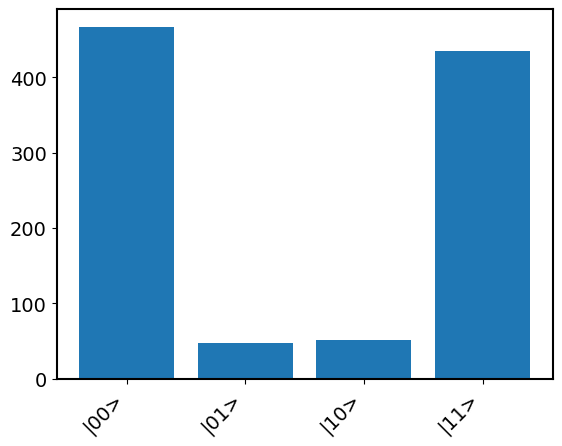

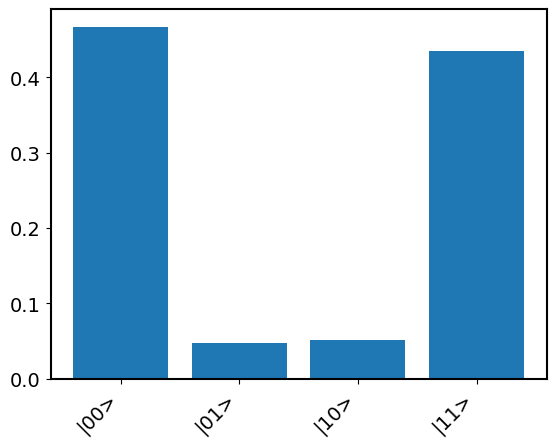

In [49]:
# In the next section, we will see
# how to run a circuit multiple times using backend
# the code below shows how to use backend and get the probability of states

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.measure import MeasureQubit
from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.backend.result import plot_histogram
from AriaQuanta.aqc.noise import BitFlipNoise


#-------------------------------------------------
qc = Circuit(3)
qc |  H(0) | CX(0,1) | H(2) | BitFlipNoise(0.1,0) | MeasureQubit([0,1])

sim = Simulator()
result = sim.simulate(qc, 1000, 1)

counts, probability = result.count()

print('\ncounting measurement on the result:\n', counts)
print('\nprobability of each state:\n', probability)

plot_histogram(counts)
plot_histogram(probability)

# Backend <a id="backend"></a>

An alternative way to run a circuit to the simple `Circuit.run()` command, is to use the backend. The backend has more advanced features and options for running a circuit. It is also suitable for dealing with large datasets, as it can be executed in parallel. The backend has three main classes, `Job`, `Simulator`, and `Result`, explained in the following.


## Job <a id="backendjob"></a>

**Class**

- Job class: Used for managing a single job 

class `AriaQuanta.backend.job.Job (job_id)`

**Attributes**

- job_id [int]
- status [string]: the information of the job status

**Methods**

- Run a job: input is a Circuit object, and the output is the statevector after running the job 

def `job_run(qc)
        return statevector`
        

## Simulator <a id="backendsimulator"></a>

**Class**

- Simulator class: Used for running a circuit for multiple times, managing the jobs, and outputing the result 

class `AriaQuanta.backend.simulator.Simulator()`

**Attributes**

- circuit [Circuit object]
- iterations [int]: number of iterations

**Methods**

- Run a job by its job_id:

def `loop_run(job_id)
    return statevector_all [A list of numpy arrays of state vectors]`
    
- Simulate multiple jobs:

def `simulate(circuit, iterations, num_nodes=1)
     return result [Result object]`
        
**Note**

**The num_nodes will specify the number of operations for parallel running (simultaneous circuit executation). The default value of 1 will run the simulation in serial.**  

### Running a circuit using simulator and outputting result <a id="runsimulator"></a>

In [50]:
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.noise import BitFlipNoise
from AriaQuanta.aqc.measure import MeasureQubit
from AriaQuanta.backend.simulator import Simulator

#-------------------------------------------------
qc = Circuit(2)
qc |  H(0) | X(1) | BitFlipNoise(0.5,1) | MeasureQubit([0],['c1'])

qc.run()
print("\nstate vector:\n", qc.statevector)
print("\ndensity matrix:\n", qc.density_matrix)

#-------------------------------------------------
qc = Circuit(2)
qc |  H(0) | X(1) | BitFlipNoise(0.5,1) | MeasureQubit([0],['c1'])

sim = Simulator()
result = sim.simulate(qc, 5, 1)

print("\nall the statevectors using simulator:\n", result.statevector_all)


state vector:
 [[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]]

density matrix:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

all the statevectors using simulator:
 (array([[0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j]]), array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]]), array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j]]), array([[0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j]]), array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j]]))


## Result <a id="backendresult"></a>

The `Result` class has the features of the ouputs of running a circuit using simulator. 

**Class**

class `AriaQuanta.backend.result.Result() (statevector_all)`

**Attributes**

- statevector_all [list of numpy array]

- density_matrix_all [list of numpy array]

**Methods**

- count the states and find the probabilities:

The output is the dictionary of counts and probabilities of result.statevector_all

def `count() 
return counts, probability`
        

**Other functions in the result module**

- statevector to density matrix conversion:

def `sv_to_density_matrix(statevector)    
return density_matrix`

- plot histogram of a counts or probabilities:

The input is a dictionary of keys and values to be plotted.

def `plot_histogram(counter)`


### Result object and its features <a id="runresult"></a>

In [51]:
# Example of Result object and its features
# statevector_all, density_matrix_all
# and to_density_matrix() function

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.noise import BitFlipNoise
from AriaQuanta.aqc.measure import MeasureQubit

from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.backend.result import sv_to_density_matrix

import numpy as np

#-------------------------------------------------
qc = Circuit(2)
qc |  H(0) | X(1) | RZZ(np.pi/3,1) | BitFlipNoise(0.5,1) | MeasureQubit([0],['c1'])

sim = Simulator()
result = sim.simulate(qc, 5, 1)

statevector_all = result.statevector_all
density_matrix_all = result.density_matrix_all

# convert one statevector to density matrix
density_matrix_one = sv_to_density_matrix(statevector_all[0])

#-------------------------------------------------
print("\nall the statevectors using simulator:\n", statevector_all)
print("\nall density matrices using simulator:\n", density_matrix_all)
print("\nconvert one statevector to density matrix:\n", density_matrix_one)



all the statevectors using simulator:
 (array([[0.       +0.j ],
       [0.       +0.j ],
       [0.       +0.j ],
       [0.8660254-0.5j]]), array([[0.8660254+0.5j],
       [0.       +0.j ],
       [0.       +0.j ],
       [0.       +0.j ]]), array([[0.8660254+0.5j],
       [0.       +0.j ],
       [0.       +0.j ],
       [0.       +0.j ]]), array([[0.8660254+0.5j],
       [0.       +0.j ],
       [0.       +0.j ],
       [0.       +0.j ]]), array([[0.       +0.j ],
       [0.       +0.j ],
       [0.       +0.j ],
       [0.8660254-0.5j]]))

all density matrices using simulator:
 [array([[0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ],
       [0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ],
       [0. +0.j       , 0. +0.j       , 0. +0.j       , 0. +0.j       ],
       [0. +0.j       , 0. +0.j       , 0. +0.j       , 0.5-0.8660254j]]), array([[0.5+0.8660254j, 0. +0.j       , 0. +0.j       , 0. +0.j       ],
       [0. +0.j       , 0. +0.j       , 0


state vector:
 [[0]
 [1]]

density matrix:
 [[0 0]
 [0 1]]

measurement =
 |1>
----------------------

counting measurement on the result:
 {'|0>': 511, '|1>': 489}

probability of each state:
 {'|0>': 0.511, '|1>': 0.489}


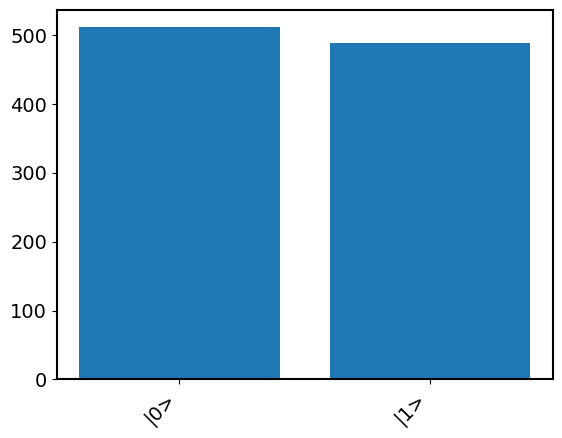

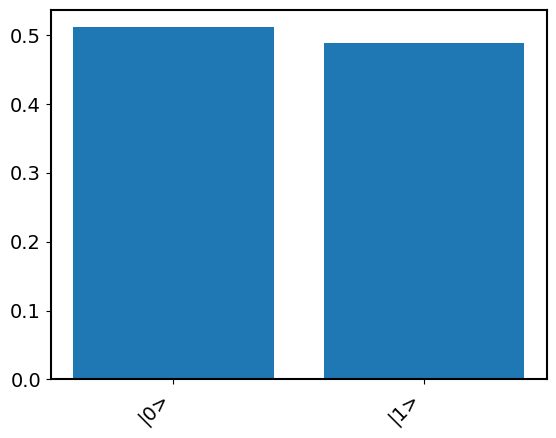

In [52]:
#Plotting histograms of counts and probability for 1-qubit system

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.backend.result import plot_histogram

#-------------------------------------------------
qc = Circuit(1)
qc |  X(0) 

qc.run()
print("\nstate vector:\n", qc.statevector)
print("\ndensity matrix:\n", qc.density_matrix)

measurement = qc.measure_all()
print('\nmeasurement =\n', measurement)

#-------------------------------------------------
qc = Circuit(1)
qc |  H(0) 

sim = Simulator()
result = sim.simulate(qc, 1000, 1)

counts, probability = result.count()

print('----------------------')
print('\ncounting measurement on the result:\n', counts)
print('\nprobability of each state:\n', probability)

plot_histogram(counts)
plot_histogram(probability)


In [53]:
# Example of measuring Result and outputting counts and probabilities

from AriaQuanta.aqc.gatelibrary import X, H
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.backend.simulator import Simulator

#-------------------------------------------------
qc = Circuit(3)
qc |  H(0) | X(1) | H(2)

sim = Simulator()
result = sim.simulate(qc, 1000, 1)

counts, probability = result.count()

print('\ncounting measurement on the result:\n', counts)
print('\nprobability of each state:\n', probability)


counting measurement on the result:
 {'|000>': 0, '|001>': 0, '|010>': 264, '|011>': 237, '|100>': 0, '|101>': 0, '|110>': 265, '|111>': 234}

probability of each state:
 {'|000>': 0.0, '|001>': 0.0, '|010>': 0.264, '|011>': 0.237, '|100>': 0.0, '|101>': 0.0, '|110>': 0.265, '|111>': 0.234}



counting measurement on the result:
 {'|000>': 0, '|001>': 0, '|010>': 232, '|011>': 252, '|100>': 0, '|101>': 0, '|110>': 271, '|111>': 245}

probability of each state:
 {'|000>': 0.0, '|001>': 0.0, '|010>': 0.232, '|011>': 0.252, '|100>': 0.0, '|101>': 0.0, '|110>': 0.271, '|111>': 0.245}


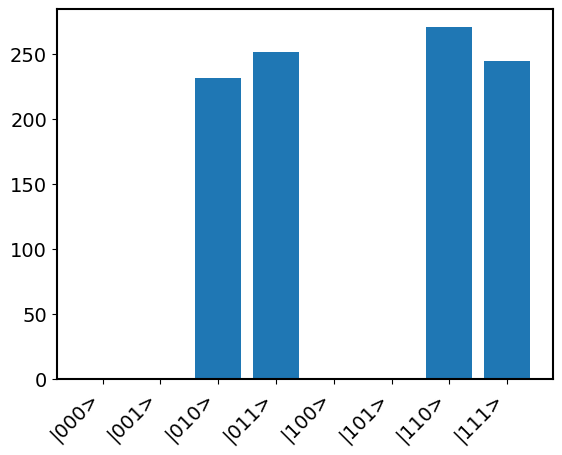

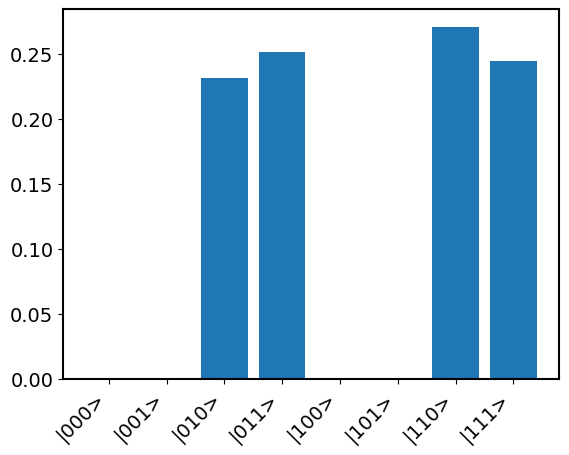

In [54]:
#Plotting histograms of counts and probability

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.backend.result import plot_histogram

#-------------------------------------------------
qc = Circuit(3)
qc |  H(0) | X(1) | H(2)

sim = Simulator()
result = sim.simulate(qc, 1000, 1)

counts, probability = result.count()

print('\ncounting measurement on the result:\n', counts)
print('\nprobability of each state:\n', probability)

plot_histogram(counts)
plot_histogram(probability)

# Quantum Algorithms <a id="algorithms"></a>


## Bernestein-Vazirani <a id="bv_algorithm"></a>


counting measurement on the result:
 {'|00>': 0, '|01>': 0, '|10>': 1000, '|11>': 0}


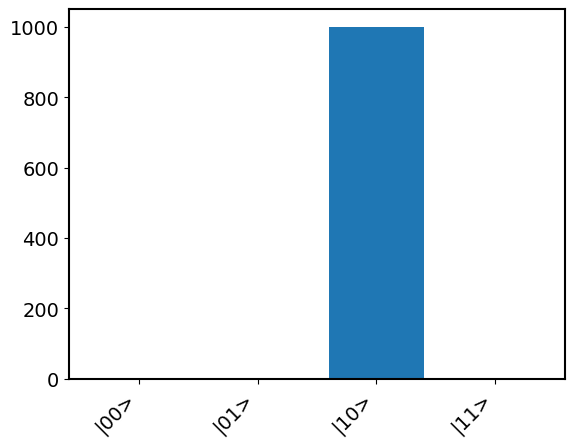

In [55]:
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import H, CX, Z, I
from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.aqc.measure import MeasureQubit, MeasureQubitResize
from AriaQuanta.backend.result import plot_histogram

#-------------------------------------------------------------------
# Bernestein-Vazirani Algorithm

qc = Circuit(3)

qc | H(0) | H(1) | H(2) | Z(2) | CX(0,2) | H(0) | H(1) | MeasureQubit([0,1])

sim = Simulator()
result = sim.simulate(qc, 1000, 1)

counts, probability = result.count()

print('\ncounting measurement on the result:\n', counts)

plot_histogram(counts)

# It outputs '10' meaning that the first qubit q0=1, and the second qubit q1=0
# In some libraries, they use the reverse order, where the first number if the q1, and the second is q0

## Teleportation <a id="teleportation"></a>

In [56]:
# Teleportation with simple run

from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import H, CX, Z, X
from AriaQuanta.aqc.measure import MeasureQubit
from AriaQuanta.aqc.operations import If_cbit
from AriaQuanta.aqc.qubit import create_state

#--------------------------------------------------
# define qubits with optional states

alpha = 0.3
# create qubit=0 with state alpha|0>+beta|1>
q0 = create_state(0,alpha) 

# create qubit=1 with state |0>
q1 = create_state(1,1)

# create qubit=2 with state |0>
q2 = create_state(2,1)

print("\nq0 state =\n", q0.state)
print("\nq1 state =\n", q1.state)
print("\nq2 state =\n", q2.state)

#--------------------------------------------------
# add qubits to a circuit
qc = Circuit(3, list_of_qubits=[q0, q1, q2])

print("\ninitial state of the circuit:\n", qc.statevector)

#--------------------------------------------------
# Make the shared entangled state 
qc | H(1)
qc | CX(1, 2)

# Alice applies teleportation gates (or projects to Bell basis)
qc | CX(0, 1)
qc | H(0)

# Alice measures her qubits
qc | MeasureQubit([0,1], ['a','b'])

# Bob applies certain gates based on the outcome of Alice's measurements
qc | If_cbit(['a',1], Z(2))
qc | If_cbit(['b',1], X(2))

#--------------------------------------------------
# simple run and output the statevector
# Bob checks the state of the teleported qubit
qc.run()
print("\nBob's statevector:\n", qc.statevector)


q0 state =
 [[0.3      ]
 [0.9539392]]

q1 state =
 [[1.]
 [0.]]

q2 state =
 [[1.]
 [0.]]

initial state of the circuit:
 [[0.3      ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.9539392]
 [0.       ]
 [0.       ]
 [0.       ]]

Bob's statevector:
 [[0.       +0.j]
 [0.       +0.j]
 [0.3      +0.j]
 [0.9539392+0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]
 [0.       +0.j]]



q0 state =
 [[0.3      ]
 [0.9539392]]

q1 state =
 [[1.]
 [0.]]

q2 state =
 [[1.]
 [0.]]

initial state of the circuit:
 [[0.3      ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.9539392]
 [0.       ]
 [0.       ]
 [0.       ]]

statevector: [[ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [ 0.       +0.j]
 [-0.3      +0.j]
 [-0.9539392+0.j]]

Bob's statevector:
 [[-0.3      +0.j]
 [-0.9539392+0.j]]

counting measurement on the result:
 {'|0>': 86, '|1>': 914}


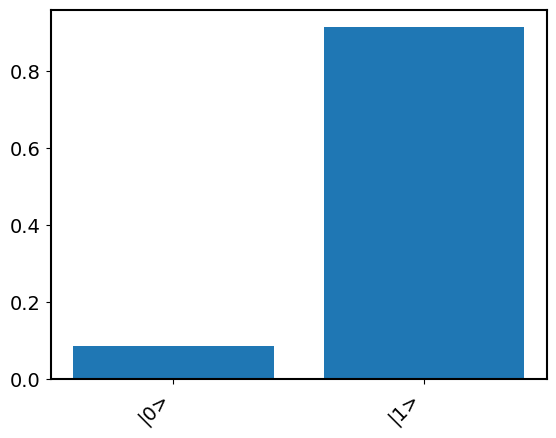

In [57]:
# Teleportation with backend

from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.gatelibrary import H, CX, Z, X
from AriaQuanta.backend.simulator import Simulator
from AriaQuanta.aqc.measure import MeasureQubit
from AriaQuanta.aqc.operations import If_cbit
from AriaQuanta.backend.result import plot_histogram
from AriaQuanta.aqc.qubit import create_state

#--------------------------------------------------
# define qubits with optional states

alpha = 0.3
# create qubit=0 with state alpha|0>+beta|1>
q0 = create_state(0,alpha) 

# create qubit=1 with state |0>
q1 = create_state(1,1)

# create qubit=2 with state |0>
q2 = create_state(2,1)

print("\nq0 state =\n", q0.state)
print("\nq1 state =\n", q1.state)
print("\nq2 state =\n", q2.state)

#--------------------------------------------------
# add qubits to a circuit
qc = Circuit(3, list_of_qubits=[q0, q1, q2])

print("\ninitial state of the circuit:\n", qc.statevector)

#--------------------------------------------------
# Make the shared entangled state 
qc | H(1)
qc | CX(1, 2)

# Alice applies teleportation gates (or projects to Bell basis)
qc | CX(0, 1)
qc | H(0)

# Alice measures her qubits
qc | MeasureQubit([0,1], ['a','b'])

# Bob applies certain gates based on the outcome of Alice's measurements
qc | If_cbit(['a',1], Z(2))
qc | If_cbit(['b',1], X(2))

#--------------------------------------------------
# Use the backend
# Run the algorithm
sim = Simulator()
result = sim.simulate(qc, 1000, 1)

# statevector for 3-qubits
statevector = result.statevector_all[0]

# statevector removing the measured qubits
bob_statevector = result.statevector_all_measured()[0]

print("\nstatevector:", statevector)
print("\nBob's statevector:\n", bob_statevector)

#Shows the results obtained from the quantum algorithm 
# result.count() -> will count the measured qubits, here 'q0' and 'q1'. when there is no measurement, it outputs all the qubits
# result.count([list]) -> will count the qubits in the list

counts, probability = result.count(['q2'])
print('\ncounting measurement on the result:\n', counts)
plot_histogram(probability)

## Deutsch Jozsa Algorithm <a id="djalgorithm"></a>

Deutsch Jozsa Algorithm
measurement =  1111
measurement = |11111>, Function is balanced


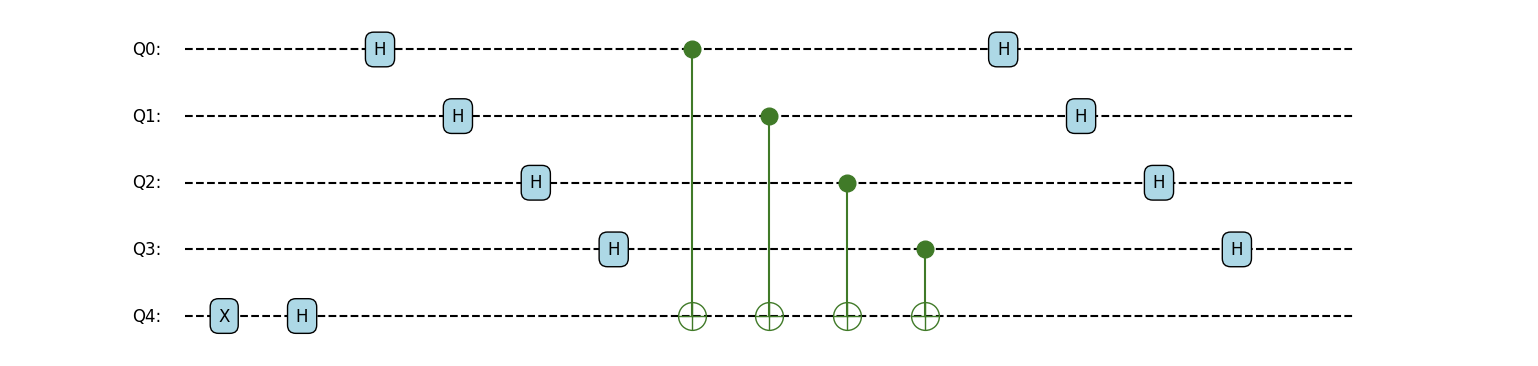

In [58]:
from AriaQuanta.algorithms import dj
from AriaQuanta.aqc.visualization import CircuitVisualizer
from AriaQuanta.aqc.circuit import Circuit

print("Deutsch Jozsa Algorithm")

# dj function:
# qc = dj(n_qubits, is_constant=True)

n_qubits = 4
qc_dj = dj(n_qubits, is_constant=False) # number of qubits and constant/balanced

qc_dj.run()
measurement = qc_dj.measure_all()

print("measurement = ", measurement[1:n_qubits+1])

# Analyze the result
# If result is all |0⟩, the function is constant; otherwise, it's balanced.
if measurement == '0' * n_qubits:
    output = "measurement = " + measurement + ", Function is constant"
else:
    output = "measurement = " + measurement + ", Function is balanced"

print(output)

visualizer = CircuitVisualizer(qc_dj)
fig, ax = visualizer.visualize()

## Grover's Algorithm  <a id="grover"></a>

measurement =  |011>


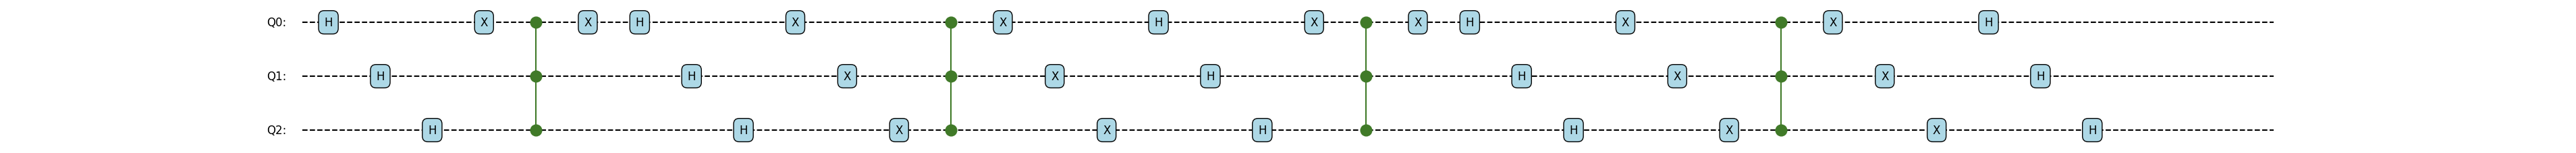

In [59]:
# "Grover's Algorithm"

from AriaQuanta.algorithms import grover
from AriaQuanta.aqc.visualization import CircuitVisualizer

# grover function:
# qc = grover(n, target_state)

qc_grover = grover(3, "011")

qc_grover.run()
measurement = qc_grover.measure_all()

print("measurement = ", measurement)

visualizer = CircuitVisualizer(qc_grover)
fig, ax = visualizer.visualize() 

## Quantum Fourier Transform <a id="qft"></a>

QFT Algorithm


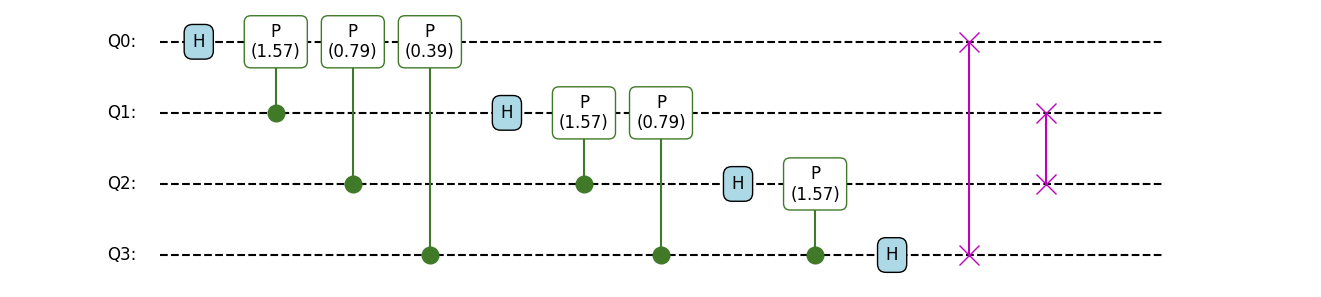

In [60]:
# "QFT's Algorithm"

from AriaQuanta.algorithms import qft
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.visualization import CircuitVisualizer

print("QFT Algorithm")

# qft function:
# qc = qft(qc, qubits)

qc_qft = Circuit(4)
qc_qft = qft(qc_qft, [0,1,2,3])

visualizer = CircuitVisualizer(qc_qft)
fig, ax = visualizer.visualize()


## Inverse Quantum Fourier Transform <a id="iqft"></a>

IQFT Algorithm


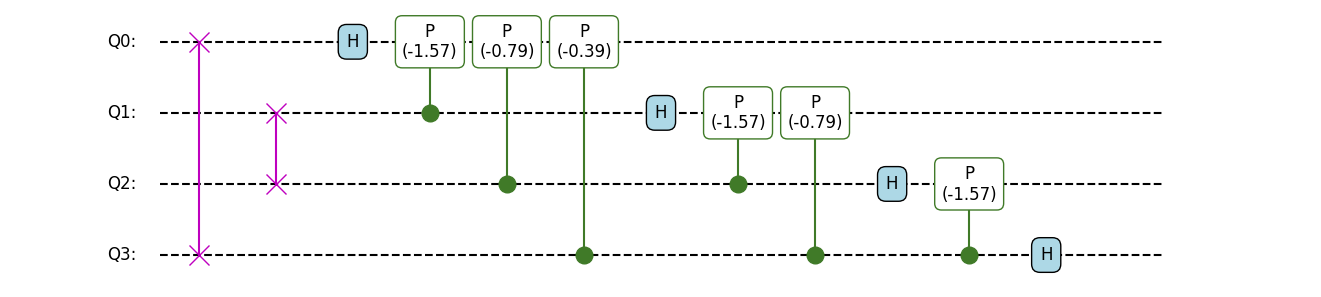

In [61]:
from AriaQuanta.algorithms import iqft
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.visualization import CircuitVisualizer

print("IQFT Algorithm")

# iqft function:
# qc = iqft(qc, qubits)

qc_qft = Circuit(4)
qc_qft = iqft(qc_qft, [0,1,2,3])

visualizer = CircuitVisualizer(qc_qft)
fig4, ax4 = visualizer.visualize()

## Quantum Phase Estimation <a id="qpe"></a>

QPE Algorithm


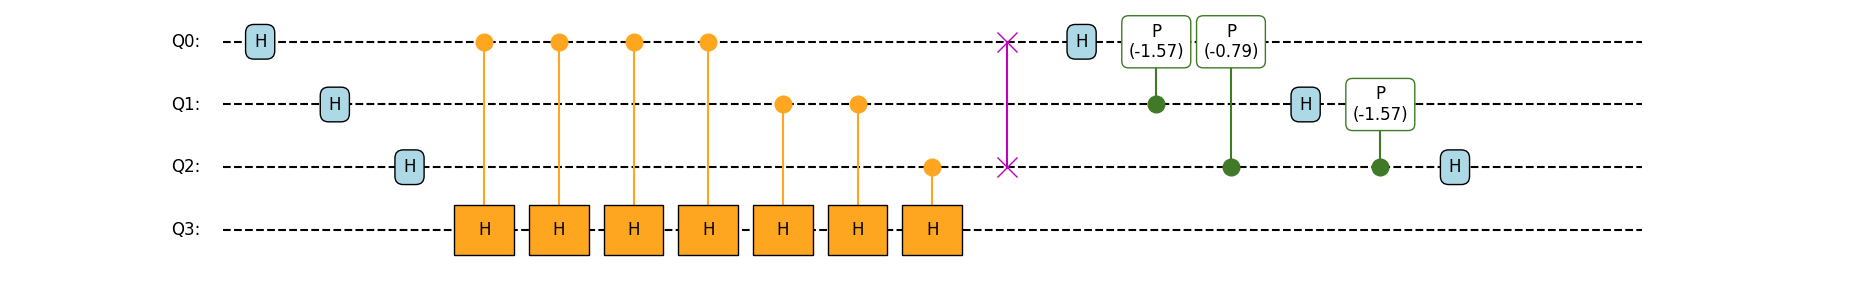

In [62]:
from AriaQuanta.algorithms import qpe
from AriaQuanta.aqc.circuit import Circuit
from AriaQuanta.aqc.visualization import CircuitVisualizer

print("QPE Algorithm")

# qpe function:
# qc = qpe(unitary_matrix, t_counting_qubits, namedraw='CU')

matrix = H().matrix
qc_qpe = qpe(matrix, 3, 'H')

visualizer = CircuitVisualizer(qc_qpe)
fig5, ax5 = visualizer.visualize() 

# Reordering the qubits <a id="reorder"></a>

In some quantum computing libraries. For example, in Qiskit, the qubits are ordered using little-endian notation, with the least significant qubits having smaller indices as indicated on the [Qiskit's Documentation](https://docs.quantum.ibm.com/api/qiskit/quantum_info)



state vector:  [[0.        +0.j]
 [0.70710678+0.j]
 [0.        +0.j]
 [0.70710678+0.j]]

density matrix:  [[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]]

probability:  {'00': 0.0, '01': 0.5, '10': 0.0, '11': 0.5}


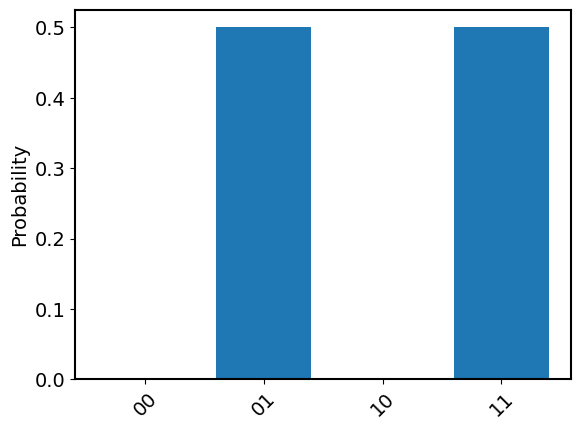

In [63]:
from AriaQuanta.aqc.gatelibrary import H, X
from AriaQuanta.aqc.circuit import Circuit, sv_to_probabilty
import numpy as np

qc = Circuit(2)
qc |  X(0) | H(1)

qc.run()

# ------------ reorder output
print("\nstate vector: ", qc.statevector_reorder)
print("\ndensity matrix: ", qc.density_matrix_reorder)

probability = sv_to_probabilty(qc.statevector_reorder, plot=True)
print("\nprobability: ", probability)

# Testing circuits comparing with Qiskit <a id="compareqiskit"></a>

## Testing single-qubit gates <a id="compareqiskit1qubit"></a>

In [64]:
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

"""
    I, ok - id
    GlobalPhase (old: Ph), Qiskit: qc(global_phase=0)
    X, ok - x
    Y, ok - y
    Z, ok - z
    S, ok - s
    Xsqrt,
    H, ok - h
    P, ok - p
    T, ok - t
    RX, ok - rx
    RY, ok - ry
    RZ, ok - rz
    Rot, ok - u
"""

qc = Circuit(3)
qc | GlobalPhase(np.pi/2) | H(0) | Z(2) | P(np.pi*2/7,1) | RZ(np.pi*2/3,1) | Rot(np.pi/4,np.pi/3,np.pi*2/5,2) | T(1) | I(0)

qc.run()

print("\nstate vector:\n", qc.statevector)
print("\nreordered state vector:\n", qc.statevector_reorder)



state vector:
 [[0.56575836+0.32664074j]
 [0.        +0.27059805j]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.56575836+0.32664074j]
 [0.        +0.27059805j]
 [0.        +0.j        ]
 [0.        +0.j        ]]

reordered state vector:
 [[0.56575836+0.32664074j]
 [0.56575836+0.32664074j]
 [0.        +0.j        ]
 [0.        +0.j        ]
 [0.        +0.27059805j]
 [0.        +0.27059805j]
 [0.        +0.j        ]
 [0.        +0.j        ]]


### Qiskits's equivalent code and output:

The below code is the Qiskits' equivalent code and the result:

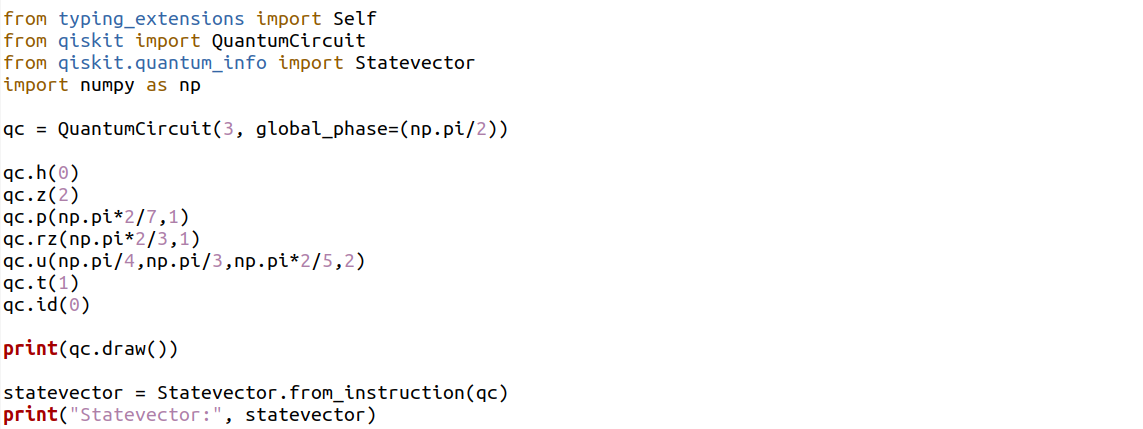

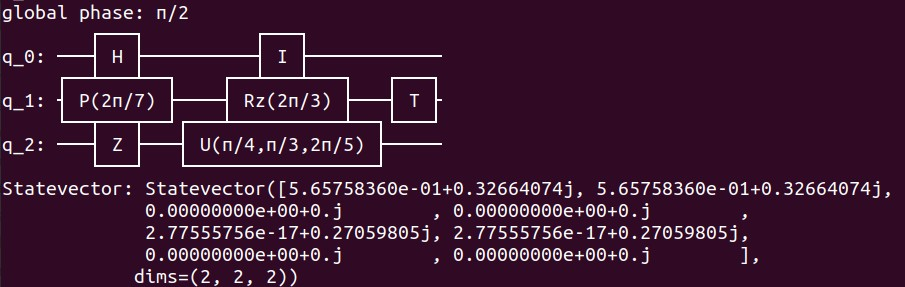

In [75]:
from IPython.display import Image, display

display(Image("qiskit_compare/qiskit_single.png", width=800))
display(Image("qiskit_compare/qiskit_single_result.jpg", width=800))


## Testing double-qubit gates <a id="compareqiskit2qubit"></a>

In [76]:
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

"""
    SWAP, ok - swap
    
    ISWAP ok - iswap
    
    SWAPsqrt, ok: 
        from qiskit.circuit.library import SwapGate
        swapsqrt = SwapGate().power(1/2)
        qc.append(swapsqrt, [0, 1])
            
    SWAPalpha, ok:
        from qiskit.circuit.library import SwapGate
        swapalpha = SwapGate().power(alpha)
        qc.append(swapalpha, [0, 1])
    
    RXX, ok - rxx
    RYY, ok - ryy
    RZZ, ok - rzz
    RXY,
    
    Barenco,
    Berkeley,
    Canonical,
    Givens,
    Magic,
"""

qc = Circuit(3)
qc | X(1) | H(2) | H(0) | RX(np.pi/3,1) | RZZ(np.pi*3/5,2,0) | SWAPalpha(np.pi*4/7,1,2)

qc.run()

print("\nstate vector:\n", qc.statevector)
print("\nreordered state vector:\n", qc.statevector_reorder)


state vector:
 [[-0.20225425-0.14694631j]
 [ 0.26848246-0.15160028j]
 [ 0.18829027-0.34566067j]
 [ 0.25451848+0.35031463j]
 [ 0.20225425-0.14694631j]
 [-0.30574971+0.03978182j]
 [ 0.35801394+0.16358651j]
 [ 0.25451848-0.35031463j]]

reordered state vector:
 [[-0.20225425-0.14694631j]
 [ 0.20225425-0.14694631j]
 [ 0.18829027-0.34566067j]
 [ 0.35801394+0.16358651j]
 [ 0.26848246-0.15160028j]
 [-0.30574971+0.03978182j]
 [ 0.25451848+0.35031463j]
 [ 0.25451848-0.35031463j]]


### Qiskits's equivalent code and output:

The below code is the Qiskits' equivalent code and the result:

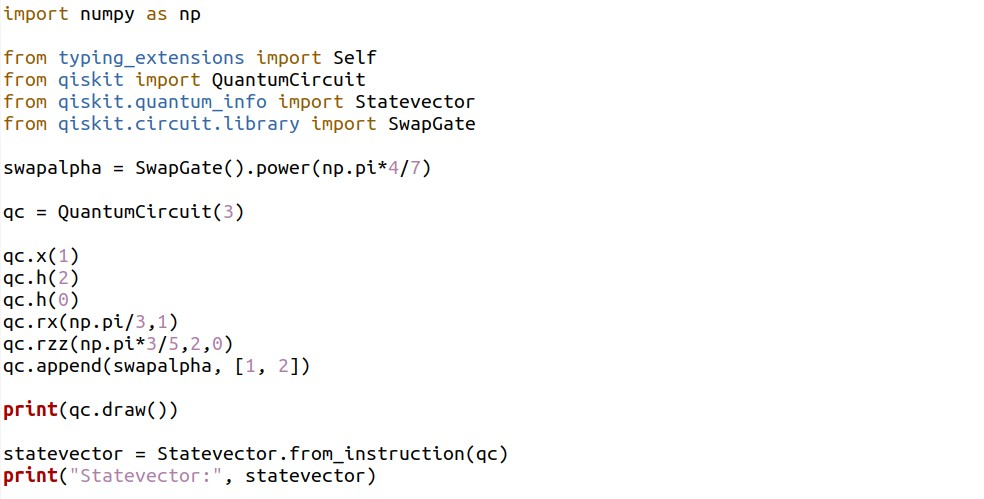

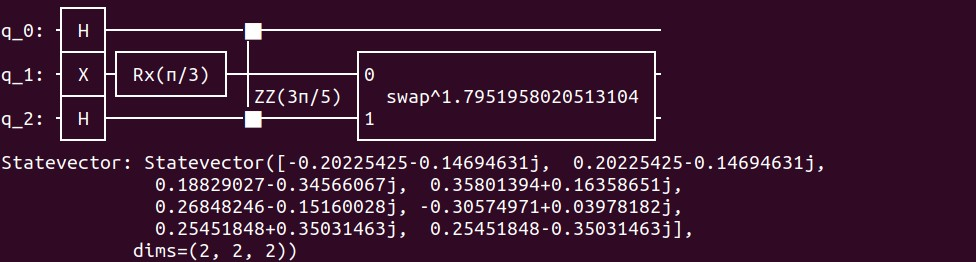

In [77]:
from IPython.display import Image, display

display(Image("qiskit_compare/qiskit_double.jpg", width=600))
display(Image("qiskit_compare/qiskit_double_result.jpg", width=800))

## Testing triple-qubit and control gates <a id="compareqisktcontrol"></a>

In [78]:
# Example of applying control on custom and 1-qubit gates

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

"""
    # control on any arbitrary gate
    CU, ok - cusotm-controlled
    
    # control on 1-qubit gates
    CX, ok - cx
    CZ, ok - cz
    CP, ok - cp
    CS, ok - cs
    CSX, ok - csx 
    
    # control on 2-qubit gates
    CCX (Toffoli) ok
    CSWAP (Fredkin) ok
"""

cx = CU(base_matrix=X().matrix, control_qubits=2, target_qubits=0)


qc = Circuit(3)
qc | X(1) | H(2) | H(0) | cx | RX(np.pi/3,1) | RZZ(np.pi*3/5,0,2) | CS(0,1)
qc.run()

#print("\nstate vector:\n", qc.statevector)
print("\nreordered state vector:\n", qc.statevector_reorder)


reordered state vector:
 [[-0.20225425-0.14694631j]
 [ 0.20225425-0.14694631j]
 [ 0.25451848-0.35031463j]
 [-0.35031463+0.25451848j]
 [ 0.20225425-0.14694631j]
 [-0.20225425-0.14694631j]
 [ 0.25451848+0.35031463j]
 [ 0.35031463+0.25451848j]]


### Qiskits's equivalent code and output:

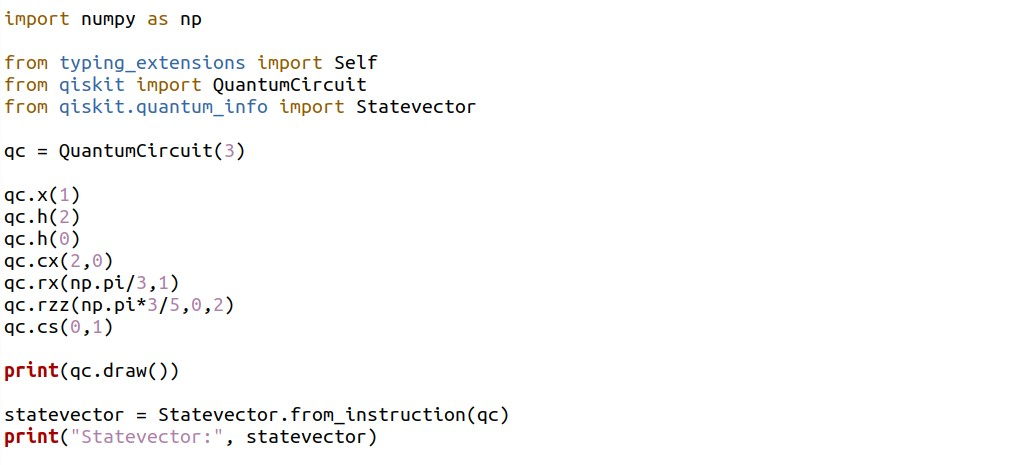

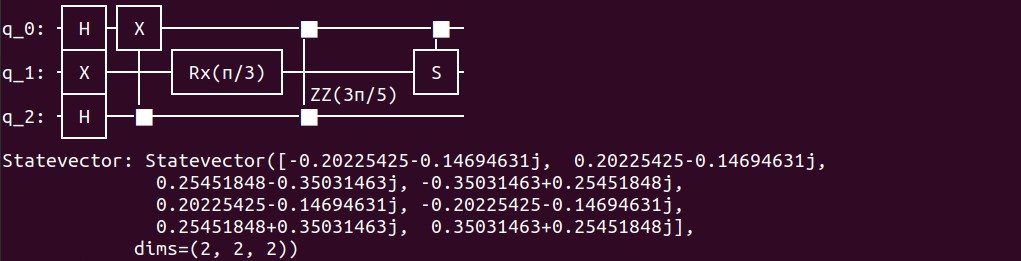

In [79]:
from IPython.display import Image, display

display(Image("qiskit_compare/qiskit_control.jpg", width=600))
display(Image("qiskit_compare/qiskit_control_result.jpg", width=800))

In [80]:
# Example of applying control on custom and 2-qubit gates
# Toffoli and Fredkin

from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

"""
    # control on any arbitrary gate
    CU, ok - cusotm-controlled
    
    # control on 1-qubit gates
    CX, ok - cx
    CZ, ok - cz
    CP, ok - cp
    CS, ok - cs
    CSX, ok - csx 
    
    # control on 2-qubit gates
    CCX (Toffoli) ok
    CSWAP (Fredkin) ok
"""

qc = Circuit(3)
qc | H(1) | H(2) | H(0) | X(1) | P(np.pi/3,0) | CSWAP(2,1,0) |  RYY(np.pi*3/5,0,2) | CCX(1,0,2)
qc.run()
#print("\nstate vector:\n", qc.statevector)
print("\nreordered state vector:\n", qc.statevector_reorder)


reordered state vector:
 [[ 0.20781347+0.2860307j ]
 [ 0.10390673-0.10605896j]
 [-0.03989638+0.14301535j]
 [ 0.10390673+0.46600244j]
 [ 0.45552332-0.14301535j]
 [ 0.20781347+0.2860307j ]
 [ 0.35161659+0.03695639j]
 [ 0.35161659+0.03695639j]]


### Qiskits's equivalent code and output:

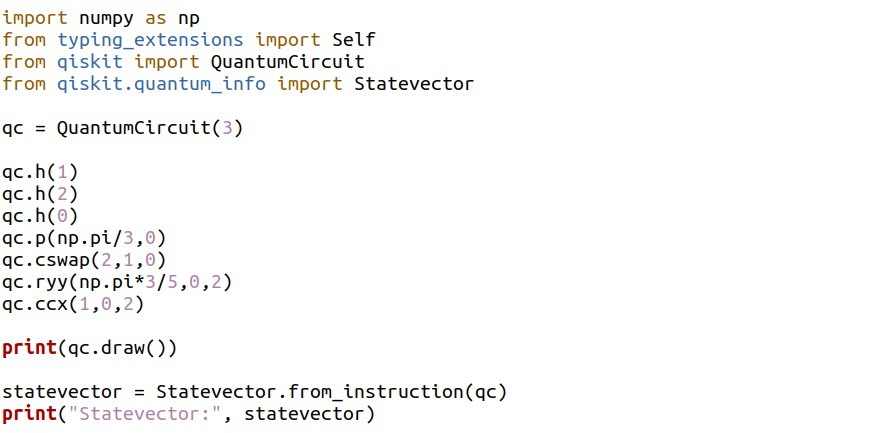

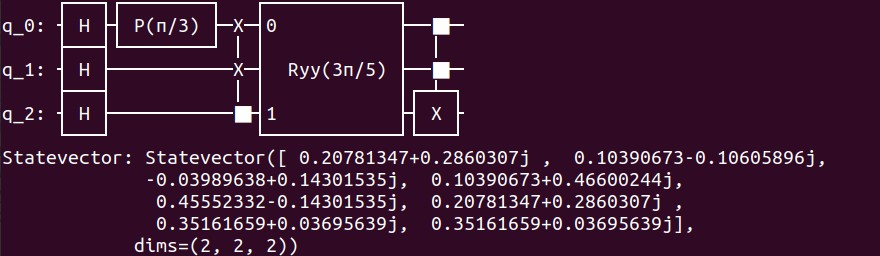

In [81]:
from IPython.display import Image, display

display(Image("qiskit_compare/qiskit_triple_control.jpg", width=600))
display(Image("qiskit_compare/qiskit_triple_control_result.jpg", width=800))

## Testing custom gates <a id="compareqiskitcustom"></a>

In [82]:
from AriaQuanta.aqc.gatelibrary import *
from AriaQuanta.aqc.circuit import Circuit
import numpy as np

"""
    # any arbitrary gate
    Custom, ok - cusotm-controlled
"""

cx = Custom(matrix=CX().matrix, target_qubits=[1,0])
swap = Custom(matrix=SWAP().matrix, target_qubits=[0,1])


qc = Circuit(2)
qc | X(1) | H(0) | RX(np.pi/3,1) | RZZ(np.pi*3/5,1,0) | cx | swap
qc.run()

#print("\nstate vector:\n", qc.statevector)
print("\nreordered state vector:\n", qc.statevector_reorder)


reordered state vector:
 [[-0.2860307 -0.20781347j]
 [ 0.35994349-0.49541971j]
 [ 0.2860307 -0.20781347j]
 [ 0.35994349+0.49541971j]]


### Qiskits's equivalent code and output:

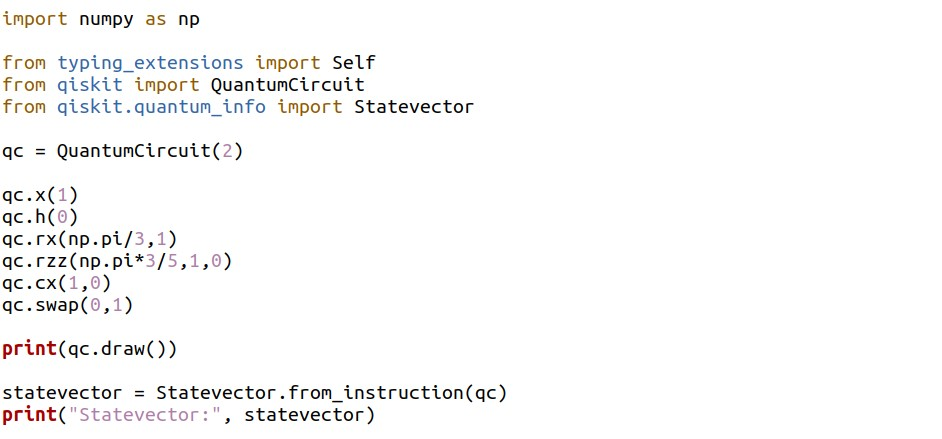

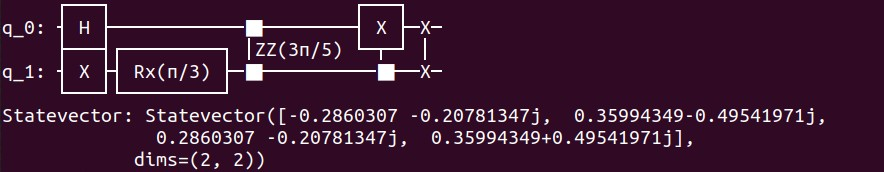

In [83]:
from IPython.display import Image, display

display(Image("qiskit_compare/qiskit_custom.jpg", width=600))
display(Image("qiskit_compare/qiskit_custom_result.jpg", width=800))

# Run-time of AriaQuanta compared with other libraries <a id="runtime"></a>

We compare `AriaQuanta` with four common quanum computing libraries - namely, `Qiskit`, `Cirq`, `PennyLane`, and `ProjectQ`. We report the runtime for three differrent gates `H`, `RX`, and `CX`. The system's configuration is as follows: 

- System's configuration:
    * Hardware Model: Acer Aspire E5-576G
    * Memory: 16 GB
    * Processor: Intel®️ Core™️ i7-7500U CPU @ 2.70GHz × 4
    * Graphics: NV118 / Mesa Intel®️ HD Graphics 620 (KBL GT2)
    * OS Name: Ubuntu 22.04.5 LTS
    * OS Type: 64-bit

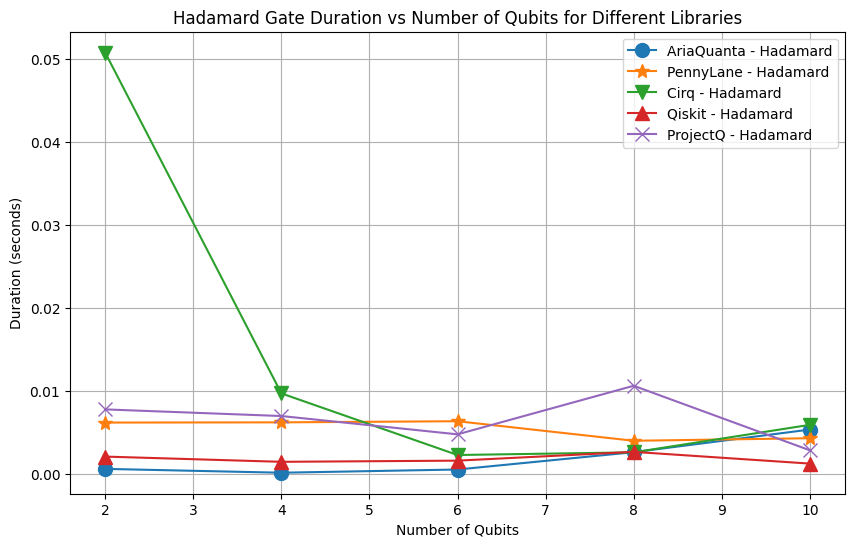

In [5]:
from IPython.display import Image, display

display(Image("aria_compare/hadamard.png", width=600))

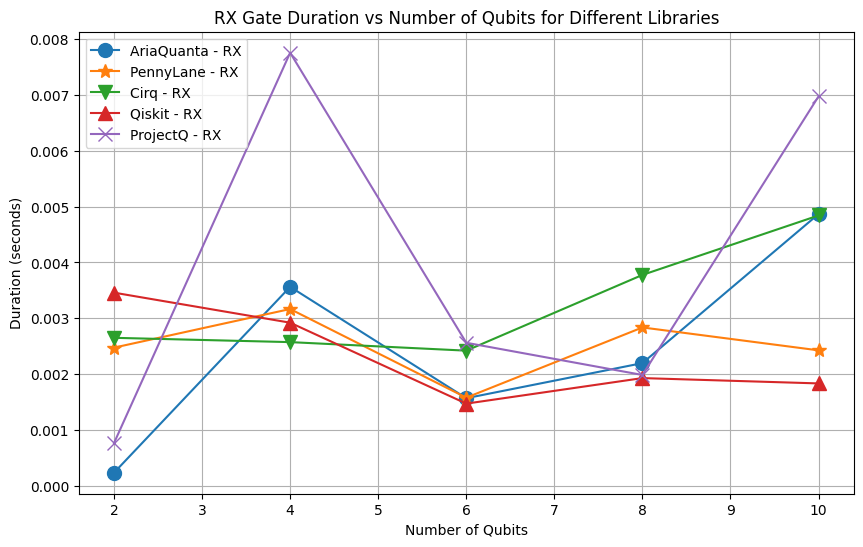

In [6]:
from IPython.display import Image, display

display(Image("aria_compare/rx.png", width=600))

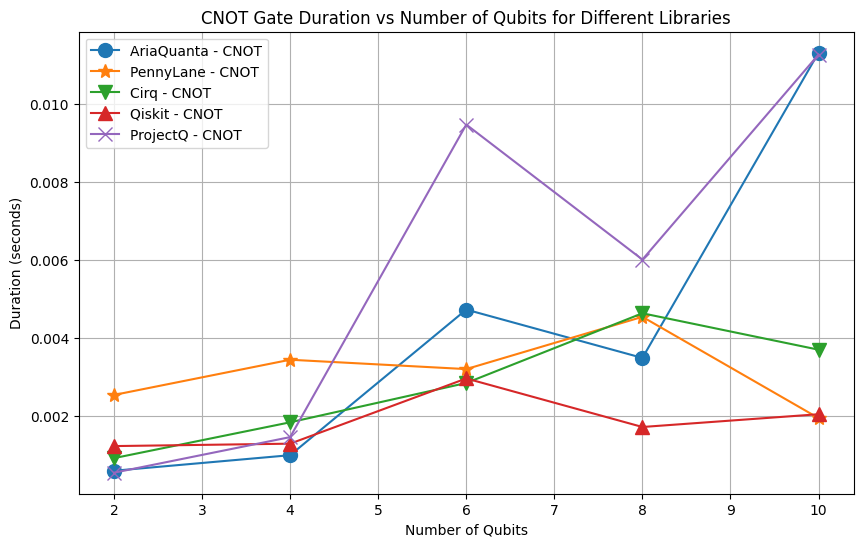

In [8]:
from IPython.display import Image, display

display(Image("aria_compare/cnot.png", width=600))